In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv("data_corona.csv")

In [3]:
df.head()

,id,diagnostic_corona,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,...,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns='Unnamed: 32',inplace=True)

In [5]:
df.set_index('id',inplace=True)

In [6]:
df.head()

,diagnostic_corona,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnostic_corona  569 non-null    object 
 1   moy_respi          569 non-null    float64
 2   moy_texture        569 non-null    float64
 3   moy_peri           569 non-null    float64
 4   moy_zone           569 non-null    float64
 5   moy_grain          569 non-null    float64
 6   moy_compact        569 non-null    float64
 7   moy_forme          569 non-null    float64
 8   moy_points         569 non-null    float64
 9   moy_fievre         569 non-null    float64
 10  moyenne_fract      569 non-null    float64
 11  se_respi           569 non-null    float64
 12  se_textu           569 non-null    float64
 13  se_peri            569 non-null    float64
 14  se_zone            569 non-null    float64
 15  se_grain           569 non-null    float64
 16  se_compact         

In [8]:
df.describe()

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#sns.pairplot(df)

<AxesSubplot:>

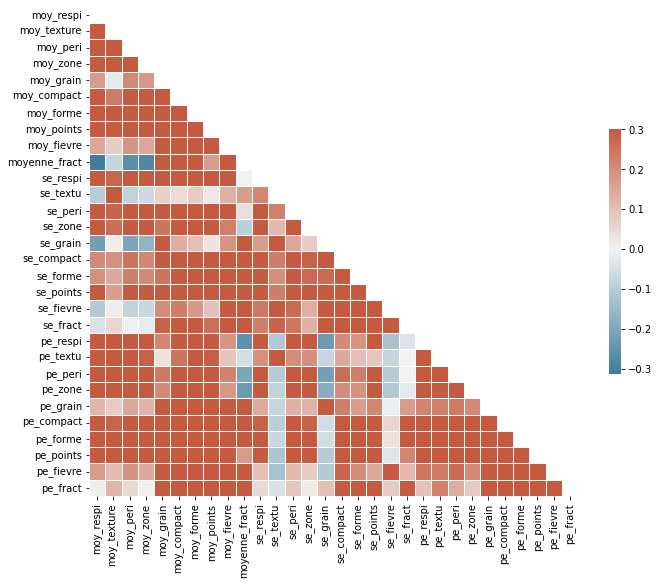

In [10]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
corr

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
moy_respi,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
moy_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
moy_peri,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
moy_zone,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
moy_grain,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
moy_compact,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
moy_forme,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
moy_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
moy_fievre,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
moyenne_fract,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


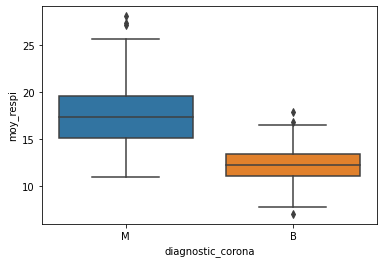

In [12]:

ax = sns.boxplot(y=df['moy_respi'],x=df['diagnostic_corona'])

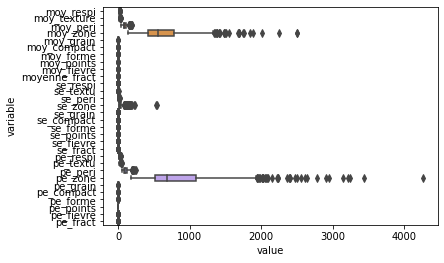

In [13]:
ax = sns.boxplot(y="variable",x="value",data=pd.melt(df.drop(columns="diagnostic_corona")))

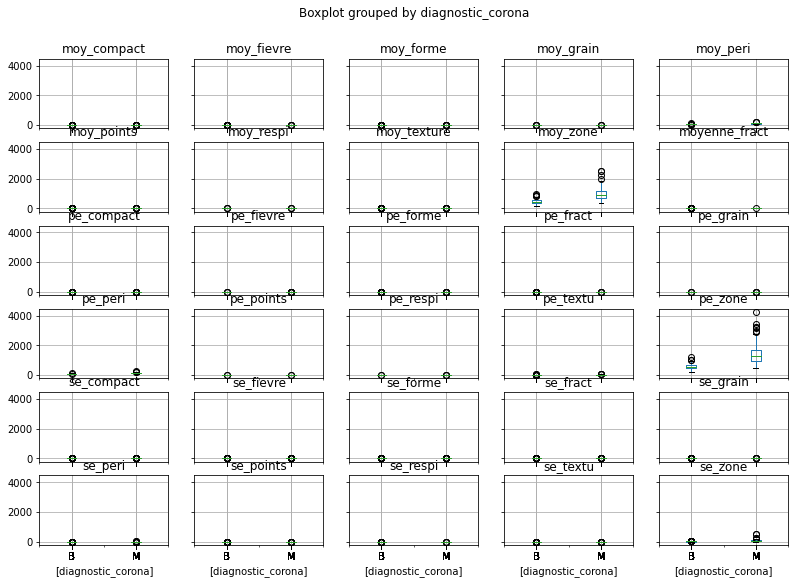

In [14]:
df.boxplot( by=['diagnostic_corona'],figsize=(13,9))
plt.show()

<AxesSubplot:xlabel='diagnostic_corona', ylabel='value'>

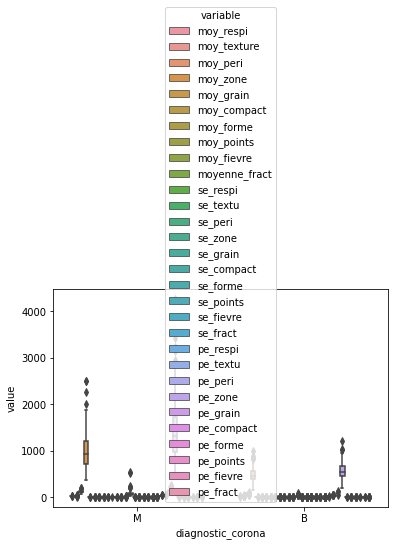

In [15]:
df_plot = df.melt(id_vars='diagnostic_corona')
sns.boxplot(x='diagnostic_corona', y='value', hue='variable', data=df_plot)

In [16]:
len(df.drop(columns="diagnostic_corona").columns.tolist())

30

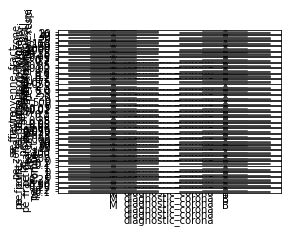

In [17]:
f, axes = plt.subplots(30, figsize = (4,3))
for i,col in enumerate(df.drop(columns="diagnostic_corona").columns.tolist()):
  sns.boxplot(x='diagnostic_corona',y=col, data=df, ax=axes[i])
#sns.boxplot(x='Heating',y='SalePrice',hue='Central Air',  data=df, ax=axes[1])

In [18]:
X = df.drop(columns="diagnostic_corona")
Y = df[['diagnostic_corona']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=12345678)

# Standard Scaling 
Uniquement sur les données de train to prevent the model from have the info given by the scaling

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [20]:
X_test.head()

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
id,,,,,,,,,,,,,,,,,,,,,
861648,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,0.05866,...,16.11,29.11,102.90,803.7,0.1115,0.1766,0.09189,0.06946,0.2522,0.07246
866083,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,0.06130,...,16.89,35.64,113.20,848.7,0.1471,0.2884,0.37960,0.13290,0.3470,0.07900
901549,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
86730502,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.1395,0.3055,0.29920,0.13120,0.3480,0.07619
8711003,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132


In [21]:
pd.DataFrame(x_test_scaled,columns=X_test.columns.tolist())

,moy_respi,moy_texture,moy_peri,moy_zone,moy_grain,moy_compact,moy_forme,moy_points,moy_fievre,moyenne_fract,...,pe_respi,pe_textu,pe_peri,pe_zone,pe_grain,pe_compact,pe_forme,pe_points,pe_fievre,pe_fract
0,0.133708,1.082306,0.100236,0.018463,-0.455669,-0.326439,-0.707411,-0.495569,-0.449026,-0.581604,...,-0.033651,0.554474,-0.134018,-0.134189,-0.899159,-0.468350,-0.852413,-0.670056,-0.599847,-0.630104
1,-0.156650,1.237089,-0.182341,-0.243068,-0.252491,-0.465250,-0.440073,-0.463186,-0.175413,-0.192713,...,0.128275,1.599028,0.170502,-0.055227,0.682205,0.268702,0.551192,0.291741,1.043904,-0.231641
2,-0.829363,-1.472763,-0.788158,-0.783838,1.973891,0.140744,-0.119831,0.160444,0.749830,0.962175,...,-0.712494,-0.818002,-0.665302,-0.709029,1.299648,-0.031261,-0.204494,0.275064,0.823696,0.569550
3,0.576433,0.509379,0.582816,0.445448,0.335583,0.463519,0.190002,0.176383,1.261053,-0.544778,...,0.663876,0.965578,0.658326,0.517332,0.344610,0.381435,0.158957,0.265968,1.061243,-0.402846
4,-0.547628,-0.322289,-0.576122,-0.569040,-0.684603,-0.685968,-0.611522,-0.653944,0.577022,-0.048352,...,-0.556796,-0.067779,-0.615929,-0.554440,-0.446072,-0.453846,-0.352802,-0.478273,0.424896,-0.090290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.018715,0.874389,0.091937,-0.134798,0.814914,2.569947,1.338710,0.430642,2.067491,1.887265,...,-0.110462,1.845370,-0.030540,-0.206658,0.957611,4.516309,2.840204,0.963362,3.984622,3.765174
167,-0.619499,-0.851322,-0.630895,-0.618385,0.080179,-0.595293,-0.578947,-0.772345,0.969440,-0.431351,...,-0.540188,-0.118967,-0.581042,-0.547947,0.264654,-0.312106,-0.194737,-0.566054,0.886117,-0.217018
168,-0.464258,-0.292256,-0.528404,-0.477315,-1.555983,-1.437678,-1.072671,-1.105816,-1.014252,-1.584767,...,-0.529808,-0.746019,-0.609424,-0.516713,-1.724045,-1.347340,-1.283232,-1.475243,-1.100948,-1.681095
169,-0.803489,-0.407766,-0.815960,-0.744652,-0.538658,-0.940829,-0.746477,-0.712385,-0.751440,-0.512370,...,-0.668898,1.707803,-0.661163,-0.629716,0.602248,-0.563283,-0.417198,-0.404440,0.182148,-0.326078


# Model training : KNN

In [22]:
model = KNeighborsClassifier(n_neighbors=5) # le 5 est pris au hasard 
model.fit(x_train_scaled, Y_train)

/Users/greg/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [23]:
model.predict(x_test_scaled)

array(['B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M'], dtype=object)

In [24]:
model.classes_

array(['B', 'M'], dtype=object)

# Model evaluation

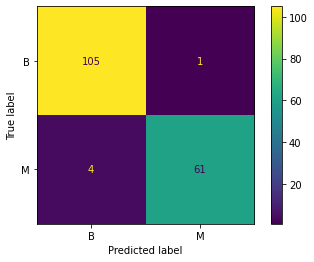

In [25]:
pred_test = model.predict(x_test_scaled) # make prediction
# Confusion metrix
cm = confusion_matrix(Y_test, pred_test, labels= model.classes_)

disp =  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()#xticks_rotation='vertical'
plt.show()

In [26]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       106
           M       0.98      0.94      0.96        65

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Cross validation